**Run the following two cells before you begin.**

In [ ]:
%autosave 10

Autosaving every 10 seconds


In [ ]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [ ]:
# Import the data set
df=pd.read_csv("/content/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1


In [ ]:
# Define the sigmoid function
def Sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z 

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [ ]:
# Create a train/test split
from sklearn.model_selection import train_test_split as tts
train_x , test_x , train_y , test_y =tts(df[["PAY_1" , "LIMIT_BAL"]] , df["default payment next month"] ,random_state=24 , test_size=0.2)
print(train_x.shape ,test_x.shape ,train_y.shape ,test_y.shape )

(21331, 2) (5333, 2) (21331,) (5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
lr=LR(solver= 'liblinear')
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [ ]:
# Fit the logistic regression model on training data
lr.fit(train_x , train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions using `.predict()`
out=lr.predict(test_x)
out

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Find class probabilities using `.predict_proba()`
yhat_prob = lr.predict_proba(test_x)
yhat_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [ ]:
# Add column of 1s to features
df["1S"] = 1

In [ ]:
# Get coefficients and intercepts from trained model

print(lr.intercept_)
print(lr.coef_)

[-6.57647457e-11]
[[ 8.27451187e-11 -6.80876727e-06]]


In [ ]:
# Manually calculate predicted probabilities
for i in range(21331):
  a= ( (train_x.iloc[i ,0])*(lr.coef_[0][0]) + (( train_x.iloc[i,1])*(lr.coef_[0][1])) + (1 * lr.intercept_[0]) )
  print(Sigmoid(a))

Streaming output truncated to the last 5000 lines.
0.41570299728585264
0.12190181312309586
0.3063897812667281
0.2782362256561581
0.41570299728585264
0.18273463934169865
0.16326891005175734
0.4660086745924127
0.32104699487104504
0.16326891002914934
0.1931234398405303
0.18273463934169865
0.351423239781456
0.10166997117695664
0.2269562971899084
0.22695629717539098
0.4491110607796698
0.4491110607796698
0.43233009517451476
0.3830520668177171
0.4491110607796698
0.4491110607387259
0.16326891006306132
0.4660086745924127
0.26477131608542614
0.03215874585892383
0.06995820319838732
0.48298465480657776
0.2269562971608736
0.21523298570585372
0.1727850169418519
0.20395546798053157
0.33606565440915415
0.336065654372229
0.2269562971899084
0.278236225689392
0.4157029973059509
0.36709460052142906
0.41570299728585264
0.466008674571822
0.23912358511270299
0.466008674571822
0.32104699487104504
0.4157029973260492
0.367094600463755
0.2269562971608736
0.20395546794022865
0.4660086745924127
0.22695629717539098

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [ ]:
# Manually calculate predicted classes


In [ ]:
# Compare to scikit-learn's predicted classes


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

Text(0.5, 1.0, 'ROC curve')

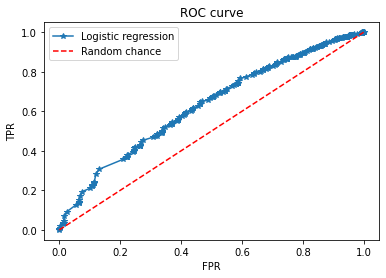

In [ ]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(test_y, yhat_prob[:,1])

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [ ]:
# Use manually calculated predicted probabilities to calculate ROC AUC
